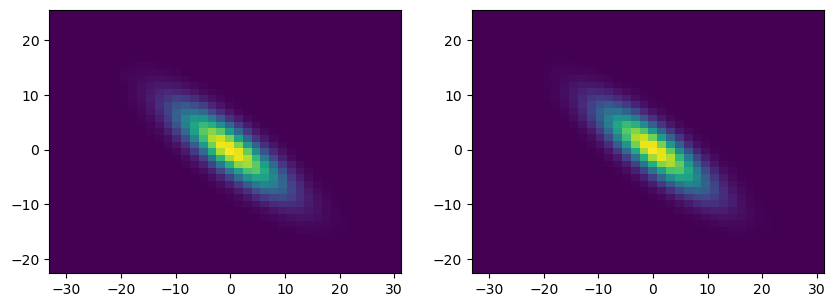

In [63]:
import numpy as np

B = np.array([[40, -26], [-26, 25]])
A = np.linalg.cholesky(B)
samples = A @ np.random.randn(2, 1000000)
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

fig, ax = plt.subplots(1, 2, figsize=(10, 7))

h, x, y, _ = ax[0].hist2d(*samples, bins=40)
ax[0].set_aspect('equal')

grid = np.stack(np.meshgrid((x[1:] + x[:-1])/2, (y[1:] + y[:-1])/2))
pdf = multivariate_normal.pdf(grid.reshape(2, -1).T, cov=B).reshape(h.shape)

ax[1].imshow(pdf, origin='lower', extent=(x.min(), x.max(), y.min(), y.max()))
ax[1].set_aspect('equal')

plt.show()

Домашнее задание 1: изобразить на рисунке с плотностью (теоретической или 2D гистограммы) эллипсы, содержащие 50%, 90%, 95% и 99% плотности вероятности гауссовского вектора с ковариационной матрицей B. Для эллипса, охватывающего 99% плотности, изобразить полуоси. Результат должен быть как на рисунке ниже:

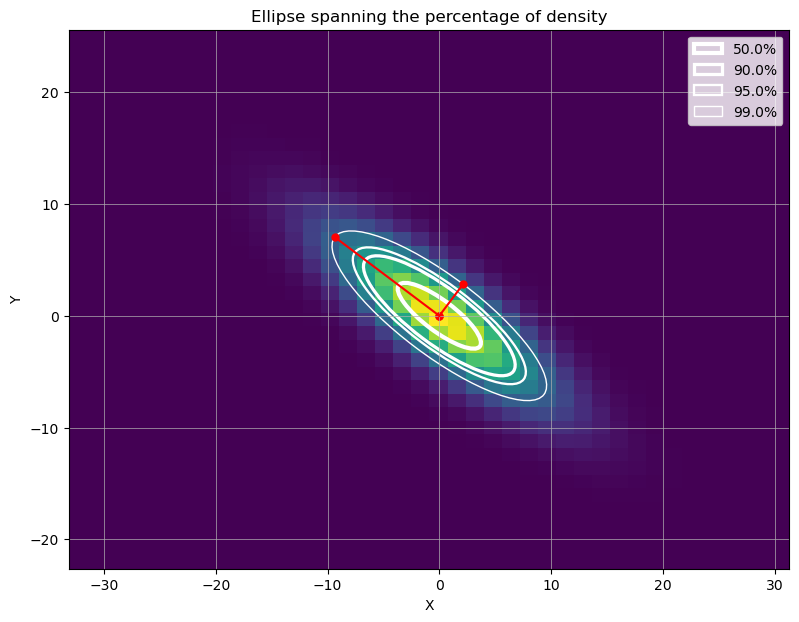

In [133]:
import numpy as np
import matplotlib.transforms as transforms
from scipy.stats import chi2
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
fig, ax = plt.subplots(1, figsize = (10, 7))
ax.imshow(pdf, origin='lower', extent=(x.min(), x.max(), y.min(), y.max()))
ax.set_aspect('equal')

dovint = [0.5,0.9,0.95,0.99] 
eigenvalues, eigenvectors = np.linalg.eig(B)  #собственные значения и векторы соотв
bigax = np.sqrt(chialpha * eigenvalues[0])#расширение на уровеннь диапазона
smallax = np.sqrt(chialpha * eigenvalues[1])
    
for i in range(len(dovint)):
    chialpha = chi2.ppf(dovint[i], 2)#значения квантиля заданного уровня альфа; 2 --  степень свободы хи^2
    bigax = np.sqrt(chialpha * eigenvalues[0])#расширение на уровеннь диапазона
    smallax = np.sqrt(chialpha * eigenvalues[1])
    beta = np.degrees(np.arctan2((-1)*eigenvectors[0, 1], eigenvectors[0, 0]))
    d = dovint[i]*100
    ellips = plt.matplotlib.patches.Ellipse([0,0], width = bigax, height = smallax, angle = beta, edgecolor='white', fill=False, linewidth=3-i*2/3, label=f'{d}%')
    ax.add_patch(ellips)
##print (eigenvectors)
plt.title('Ellipse spanning the percentage of density')
s = [0,(eigenvectors[0,0]*(-1))*bigax/2]#координаты точек s и t как опред аргументы sc
t = [0, eigenvectors[0, 1] * bigax/2]
plt.scatter(s, t, s = 25, color = 'red') 
plt.plot(s, t, color = 'red')
s = [0,eigenvectors[1,0]*(-1)*smallax/2]
t = [0, eigenvectors[1, 1]*smallax/2]
plt.scatter(s, t,s = 25, color = 'red') 
plt.plot(s, t, color = 'red')
plt.grid(True, linestyle='-', linewidth=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
2 сделано